## Introduction
I like sushi. 

I've been trying to eat a bit better lately though (aren't we all?) and so got to wondering: just how bad for you is sushi exactly? What are some of the better nutritional choices I can make when I go out to eat at my favorite Japanese(ish) place? What on the menu should I definitely avoid?

And then I got thinking like I normally get think about the world, that hey, it's all just data, and I remembered how I could just take some nutritional information as raw data as <a href="http://www.everydayanalytics.ca/2012/05/im-lovin-it.html"> I've previously done ages ago for Mickey D's </a> and see if anything interesting pops out. Plus this seemed like as good as an excuse as any to do some work with the good old <a href="http://www.numpy.org/">data</a> <a href="http://pandas.pydata.org/">analysis</a> <a href="http://matplotlib.org/">and visualization</a> <a href="http://www.scipy.org">stack</a> for python, and <a href="http://jupyter.org/">ipython notebooks</a>, instead of my usual go-to tool of R.

So let's have a look, shall we?

## Background
As always, the first step is getting the data; sometimes the most difficult step. Here the menu in question I chose to use was that from <a href="http://www.sushistop.com">Sushi Stop</a> (I am in no way affiliated nor associated with said brand, nor I am endorsing it), where the nutritional information unfortunately was only available as a <a href="http://www.sushishop.com/themes/web/assets/files/nutritional-information-en.pdf">PDF</a>, as is often the case.

This is a hurdle data analysts, but more often I think, research analysts and data journalists, can often run into. Fortunately there are tools at our disposal to deal with this kind of thing, so not to worry. Using the awesome <a href="http://tabula.technology/">Tabula</a> and a little bit of ad hoc cleaning from the command line, it was a simple matter of extracting the data from the PDF and into a convenient CSV. Boom, and we're ready to go.

<img width="683px" height="300px" src="http://2.bp.blogspot.com/-Vm78EmYandY/VjkU1gb5EVI/AAAAAAAACh0/hizB136-Zvo/s320/tabula_screenshot3.png"/>
<center><i>Tabula</i></center>

The data comprises 335 unique items in 17 different categories with 15 different nuritional variables. Let's dig in.

## Analysis 
First we include the usual suspects in the python data analysis stack (numpy, matplotlib and pandas), then read the data into a dataframe using pandas.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("tabula-nutritional-information.csv", delimiter=",")

Okay, are we wokring with here? Let's take a look:

In [3]:
print(data.columns)
print(len(data.columns))
data.head()

Index(['category', 'item', 'serving_size', 'calories', 'fat', 'saturated_fat',
       'trans_fat', 'cholesterol', 'sodium', 'carbohydrates', 'fibre', 'sugar',
       'protein', 'vitamin_a', 'vitamin_c', 'calcium', 'iron'],
      dtype='object')
17


,category,item,serving_size,calories,fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,fibre,sugar,protein,vitamin_a,vitamin_c,calcium,iron
0,APPETIZERS & SALADS,Shrimp Tempura,60,180,8.0,0.0,0.0,40,125,18,0.0,0,8.0,0,0,0,0
1,APPETIZERS & SALADS,Three salads,120,130,3.5,0.0,0.0,60,790,13,4.0,8,8.0,2,6,40,8
2,APPETIZERS & SALADS,Wakame,125,110,2.0,0.0,0.0,0,1650,13,4.0,9,0.0,0,0,110,0
3,APPETIZERS & SALADS,Miso soup,255,70,3.0,0.5,0.0,0,810,8,1.0,1,6.0,0,0,20,25
4,APPETIZERS & SALADS,Grilled salmon salad,276,260,19.0,2.5,0.0,30,340,12,3.0,6,12.0,80,80,8,8


Let's look at the distribution of the different variables. You can see that most a heavily skewed or follow power law / log-normal type distributions as most things in nature do. Interestingly there is a little blip there in the serving sizes around 600 which we'll see later is the ramen soups.

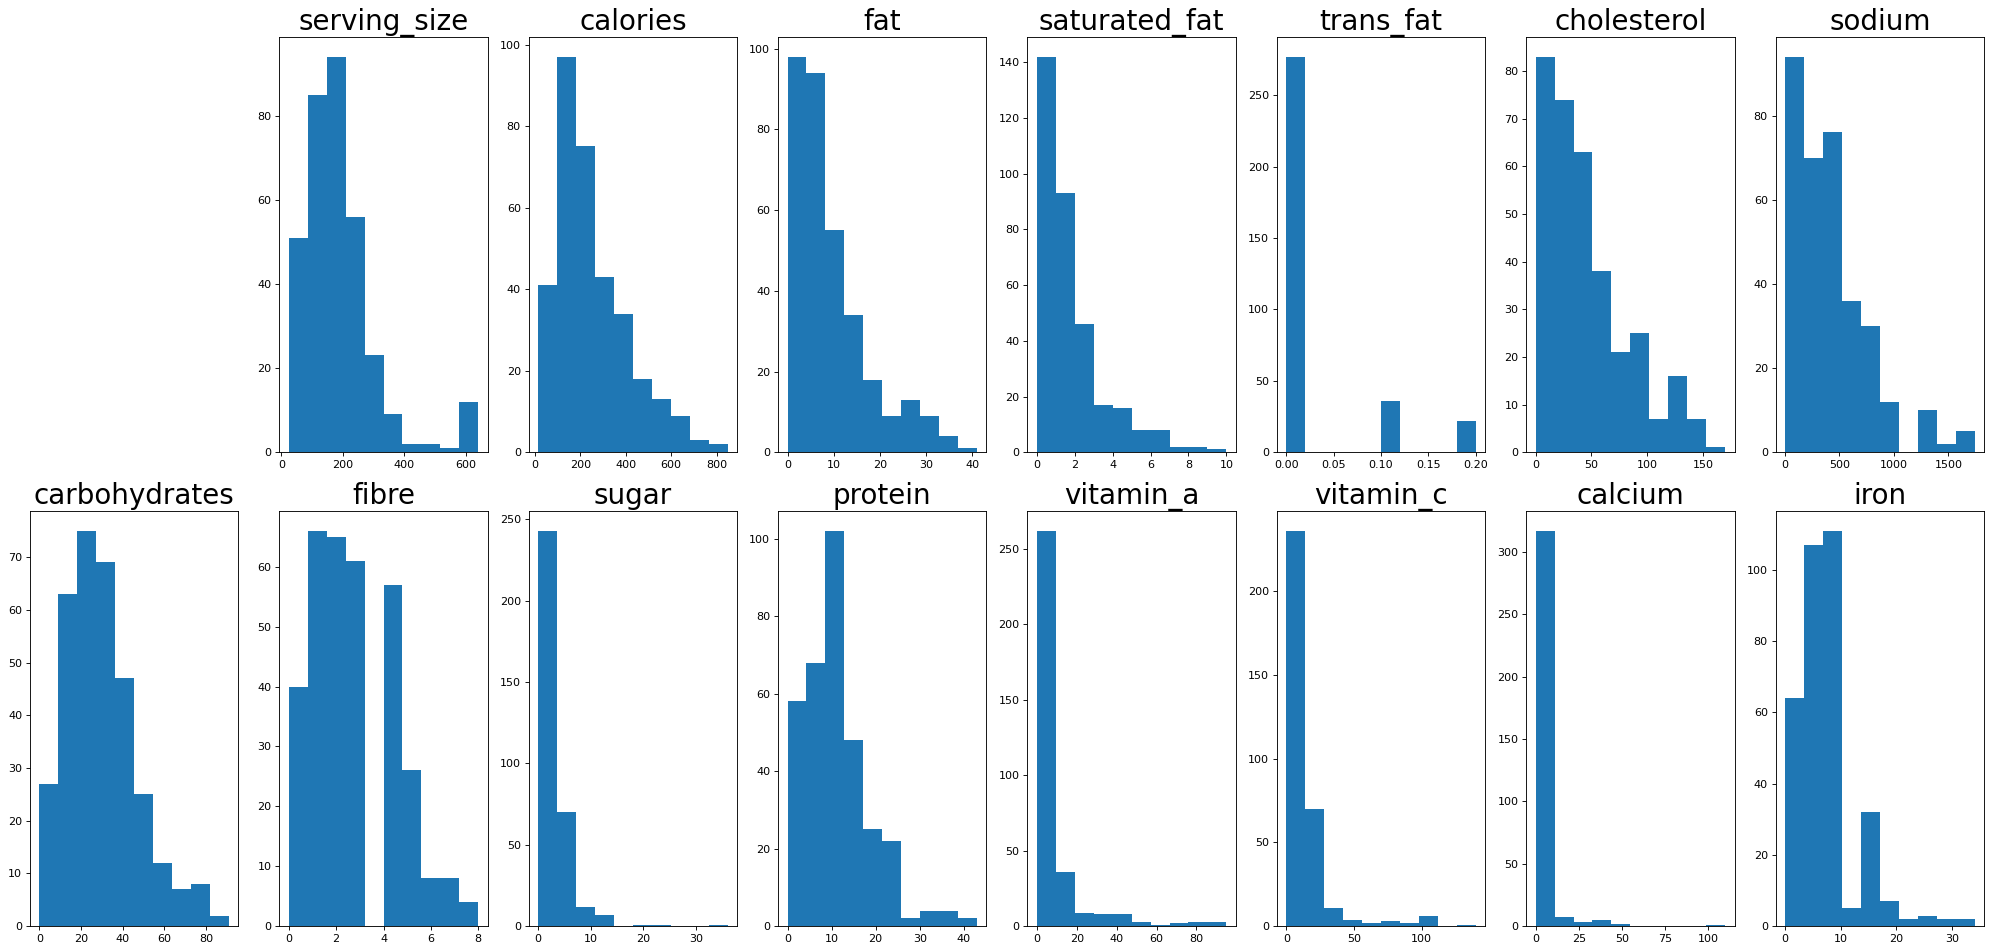

In [4]:
# Have a look
plt.figure(0, figsize=(25,12), dpi=80)
for i in range(2,len(data.columns)):
    fig = plt.subplot(2,8,i)
    plt.title(data.columns[i], fontsize=25)
    plt.hist(data[data.columns[i]])
#    fig.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

Let's do something really simple, and without looking at any of the other nutrients just look at the <a href="http://www.calorieking.com/learnabouts/What-Is-Calorie-Density_MTAyMg.html">caloric density</a> of the foods. We can find this by dividing the number of calories in each item by the serving size. We'll just look at the top 10 worst offenders or so:

In [5]:
data['density']= data['calories']/data['serving_size']
data[['item','category','density']].sort_values('density', ascending=False).head(12)

,item,category,density
314,Yin Yang Sauce,EXTRAS,5.000000
311,Ma! Sauce,EXTRAS,4.375000
75,Akanasu (brown rice),HOSOMAKI,3.119266
0,Shrimp Tempura,APPETIZERS & SALADS,3.000000
312,Spicy Light Mayo,EXTRAS,2.916667
74,Akanasu,HOSOMAKI,2.844037
67,Akanasu avocado (brown rice),HOSOMAKI,2.684564
260,Teriyaki Bomb ‐ brown rice (1 pc),TEMARI,2.539683
262,Teriyaki Bomb ‐ brown rice (4 pcs),TEMARI,2.539683
66,Akanasu avocado,HOSOMAKI,2.483221


The most calorically dense thing is Ying-Yang Sauce, which as far as I could ascertain was just mayonnaise and something else put in a <a href="http://www.sushishop.com/themes/web/assets/files/menuitem/yin_amp_yang.png"> ying-yang shape on a plate.</a>
Excluding the other sauces (I assume Ma! also includes mayo), the other most calorically dense foods are the variations of the <a href="http://www.sushishop.com/themes/web/assets/files/menuitem/akanasu_hosomaki.png">Akanasu roll</a> (sun-dried tomato pesto, light cream cheese, sesame), shrimp tempura (deep fried, so not surprising) and teriyaki bombs, which are basically seafood, cheese and mayo smushed into a ball, deep fried and covered with sauce (<a href="http://www.sushishop.com/themes/web/assets/files/menuitem/temari2.png">guh!</a>). I guess sun-dried tomato pesto has a lot of calories. Wait a second, does brown rice have more calories than white? Oh right, sushi is made with sticky rice, and <a href="http://1.bp.blogspot.com/-UuTw2FWEyjs/VlYY4eK5ANI/AAAAAAAACic/Ows5oBA9Apc/s1600/google%2Bsticky%2Bvs%2Bbrown.png"> yes, yes it does.</a> Huh, today I learned.

We can get a more visual overview of the entire menu by plotting the two quantities together. Calories divided by serving size = calories on the y-axis, serving size on the x. Here we colour by category and get a neat little scatterplot.

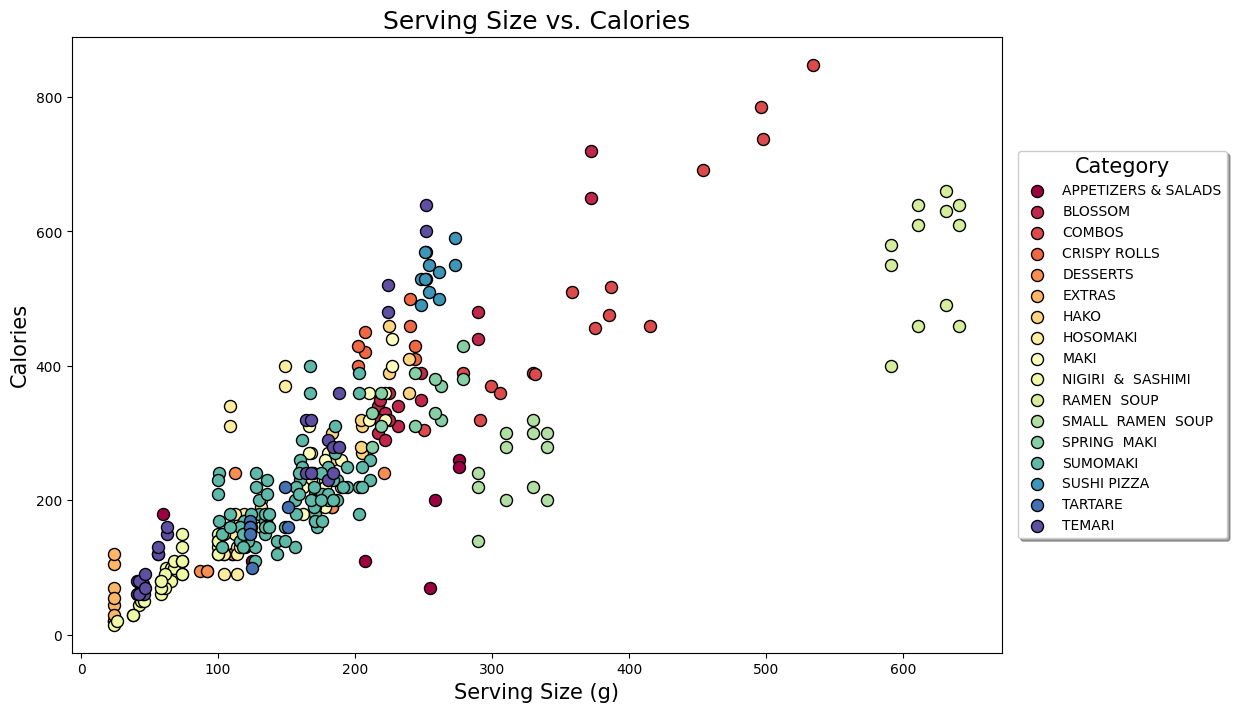

In [6]:
# Get the unique categories
categories = np.unique(data['category'])

# Get the colors for the unique categories
cm = plt.get_cmap('Spectral')
cols = cm(np.linspace(0, 1, len(categories)))

# Iterate over the categories and plot
plt.figure(figsize=(12,8))
for category, col in zip(categories, cols):
    d = data[data['category']==category]
    plt.scatter(d['serving_size'], d['calories'], s=75, color=col, label=category, edgecolors='black')
    plt.xlabel('Serving Size (g)', size=15)
    plt.ylabel('Calories', size=15)
    plt.title('Serving Size vs. Calories', size=18)

legend = plt.legend(title='Category', loc='center left', bbox_to_anchor=(1.01, 0.5),
          ncol=1, fancybox=True, shadow=True, scatterpoints=1)
legend.get_title().set_fontsize(15)

You can see that the nigiri & sashimi generally have smaller serving sizes and so less calories. The ramen soup is in a category all its own with much larger serving sizes than the other items, as I mentioned before and we saw in the histograms. The other rolls are kind of in the middle. The combos, small ramen soups and some of the appetizers and salads also sit away from the 'main body' of the rest of the menu.

Points which lie further from the line <i>y=x</i> have higher caloric density, and you can see that even though the top ones we picked out above had the highest raw values and we can probably guess where they are in the graph (the sauces are the vertical blue line near the bottom left, and the Akanasu are probably those pairs of dark green dots to the right), there are other categories which are probably worse overall, like the cluster of red which is sushi pizza. Which category of the menu has highest caloric density (and so is likely best avoided) overall?

In [7]:
# Find most caloric dense categories on average
density = data[['category','density']]
grouped = density.groupby('category')
grouped.agg(np.average).sort_values('density', ascending=False).head()

,density
category,
EXTRAS,2.421875
SUSHI PIZZA,2.099515
CRISPY ROLLS,1.969304
TEMARI,1.807691
HAKO,1.583009


As expected, we see that other than the extras (sauces) which have very small serving sizes, on average the sushi pizzas are the most calorically dense group of items on the menu, followed by crispy rolls. The data confirm: deep fried = more calories.

What if we were only concerned with fat (as many weight-conscious people dining out are)? Let's take a look at the different categories with a little more depth than just a simple average:

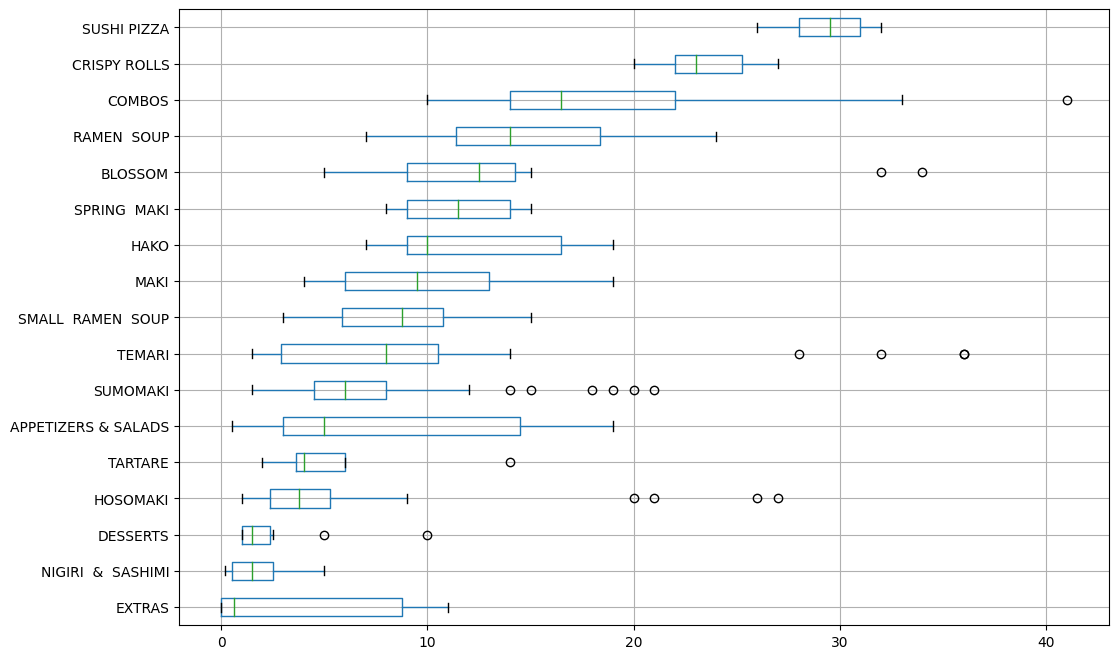

In [8]:
# Boxplot of fat content
fat = data[['category','fat']]
grouped = fat.groupby('category')

# Sort
df2 = pd.DataFrame({col:vals['fat'] for col,vals in grouped})
meds = df2.median()
meds.sort_values(ascending=True, inplace=True)
df2 = df2[meds.index]

# Plot
plt.figure(figsize=(12,8))
fatplot = df2.boxplot(vert=False)

While the combos and appetizers and salads have vary wide ranges in their fat content, we see again that the sushi pizza and crispy rolls have the most fat collectively and so are best avoided.

Now another thing people are often worried about when they are trying to eat well is the amount of sodium they take in. So let's repeat our previous approach in visually examining caloric density, only this time plot it as one metric on the x-axis and look at where different items on the menu sit with regards to their salt content.

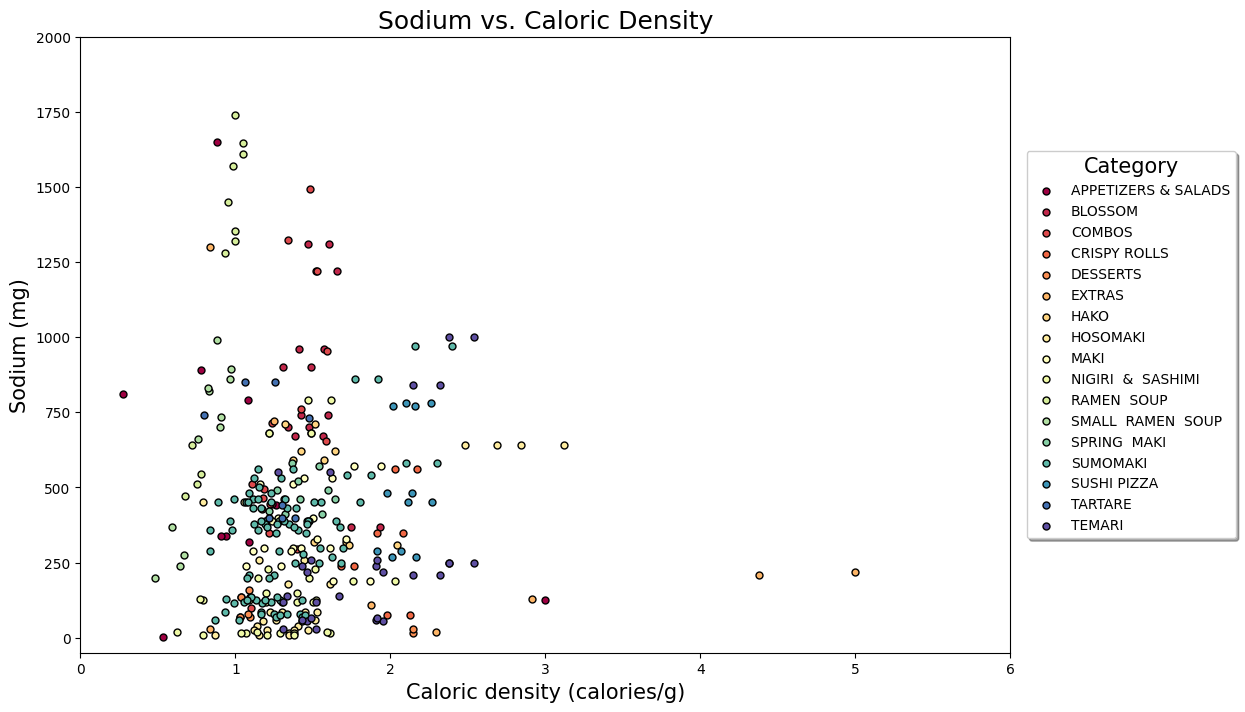

In [9]:
fig = plt.figure(figsize=(12,8))
plt.xlim(0,6)
plt.ylim(-50, 2000)
for category, col in zip(categories, cols):
    d = data[data['category']==category]
    plt.scatter(d['density'], d['sodium'], s=25, color=col, label=category, edgecolor='black')
    plt.xlabel('Caloric density (calories/g)', size=15)
    plt.ylabel('Sodium (mg)', size=15)
    plt.title('Sodium vs. Caloric Density', size=18)

legend = plt.legend(title='Category', loc='center left', bbox_to_anchor=(1.01, 0.5),
          ncol=1, fancybox=True, shadow=True, scatterpoints=1)
legend.get_title().set_fontsize(15)

Here we can see that while the extras (sauces) are very calorically dense, you're probably not going to take in a crazy amount of salt unless you go really heavy on them (bottom right). If we're really worried about salt the ramen soups should be avoided, as most of them have very high sodium content (straight line of light green near the left), some north of 1500mg, which is the <a href="http://www.hc-sc.gc.ca/fn-an/nutrition/sodium/index-eng.php#a2">daily recommended intake by the Health Canada for Adults 14-50</a>. There's also some of the other items we've seen before not looking so good (sushi pizza). Some of the temari (like the teriyaki bombs) and sumomaki ('regular' white-on-the-outside maki rolls) should be avoided too? But which ones?

A plot like this is pretty crowded, I'll admit, so is really better explored, and we can do that using the very cool (and very under-development) <a href="http://mpld3.github.io/">MPLD3</a> package, which combines the convenience of matplotlib with the power of <a href="http://d3js.org/">D3</a>.

Below is the same scatterplot, only interactive, so you can mouse over and see what each individual point is. The items to be most avoided (top right in grey and orange), are indeed the teriyaki bombs, as well as the <a href="http://www.sushishop.com/themes/web/assets/files/menuitem/inferno_sumomaki.png">inferno roll</a> (tempura, light cream cheese, sun-dried tomato pesto, red and orange masago, green onion, spicy light mayo, spicy sauce, sesame) as we saw before. Apparently that sun-dried tomato pesto is best taken in moderation.

The Akanasu rolls are the horizontal line of 4 green points close by. Your best bet is probably just to stick to the nigri and sashimi, and maybe some of the regular maki rolls closer to the bottom left corner.

In [14]:
import mpld3
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(0,6)
ax.set_ylim(-50,2000)
N = 100

for category, col in zip(categories, cols):
    d = data[data['category']==category]
    scatter = ax.scatter(d['density'], d['sodium'], s=40, color=col, label=category)
    labels = list(d['item'])
    tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
    mpld3.plugins.connect(fig, tooltip)

    
mpld3.display()

# Conclusion

Well, there we have it folks. A simple look at the data tells us some common-sense things we probably already new:
- Deep fried foods will make you fat
- Mayo will make you fat
- Soup at Japanese restaurants is very salty
- Sashimi is healthy if you go easy on the soy

And surprisingly, one thing I would not have thought: that sundried tomato pesto is apparently really bad for you if you're eating conscientiously.

That's all for now. See you next time and enjoy the raw fish.

## References and Resources

<b>Tablua</b><br>
<i><a href="http://tabula.technology/">http://tabula.technology/</a></i>

<b>Sushi Stop - Nutritional Information (PDF)</b><br>
<i><a href="http://www.sushishop.com/themes/web/assets/files/nutritional-information-en.pdf">http://www.sushishop.com/themes/web/assets/files/nutritional-information-en.pdf</a></i>

<b>Food & Nutrition - Sodium in Canada (Health Canada)</b><br>
<i><a href="http://www.hc-sc.gc.ca/fn-an/nutrition/sodium/index-eng.php">http://www.hc-sc.gc.ca/fn-an/nutrition/sodium/index-eng.php</a></i>

<b> code & data on github </b><br>
<i><a href="https://github.com/mylesmharrison/i_heart_sushi/">https://github.com/mylesmharrison/i_heart_sushi/</a></i>